In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [5]:
data = pd.read_csv("./IPL Matches 2008-2020.csv")

In [6]:
data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [9]:
# Drop the "method" feature
data.drop(['method'], axis=1, inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  umpire1          816 non-null    object 
 15  umpire2          816 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory usage: 102.1+ KB


### Most Wins in IPL

In [17]:
temp = pd.DataFrame({"Winner": data['winner']})
count_wins = temp.value_counts()
labels = [X[0] for X in count_wins.keys()]
labels

['Mumbai Indians',
 'Chennai Super Kings',
 'Kolkata Knight Riders',
 'Royal Challengers Bangalore',
 'Kings XI Punjab',
 'Rajasthan Royals',
 'Delhi Daredevils',
 'Sunrisers Hyderabad',
 'Deccan Chargers',
 'Delhi Capitals',
 'Gujarat Lions',
 'Pune Warriors',
 'Rising Pune Supergiant',
 'Kochi Tuskers Kerala',
 'Rising Pune Supergiants']

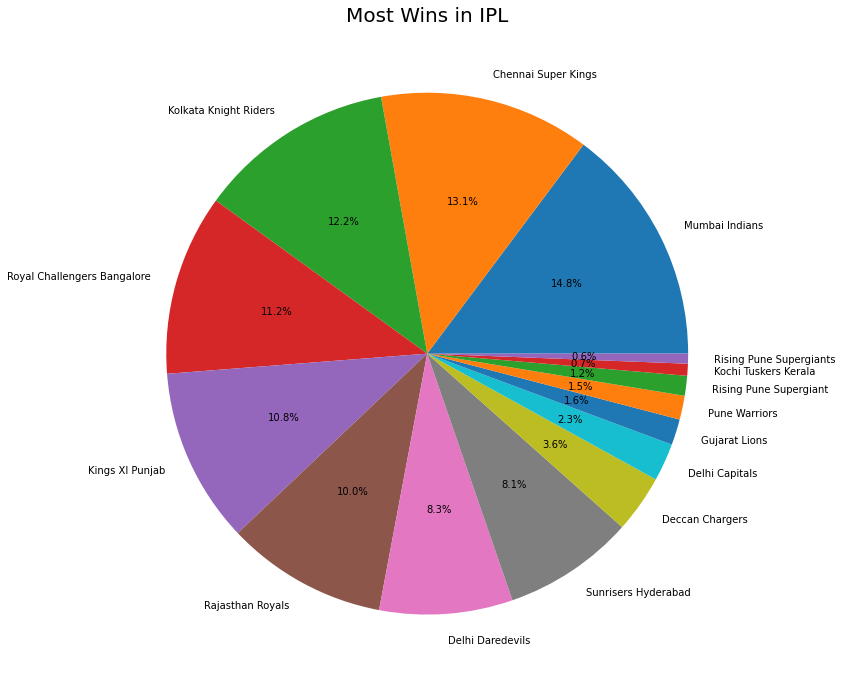

In [20]:
bar, ax = plt.subplots(figsize=(18,12))
ax = plt.pie(x = count_wins, autopct="%.1f%%", labels=labels)
plt.title("Most Wins in IPL", fontsize=20)
plt.show()

### Most Wins in Eliminator

C:\Users\deban\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


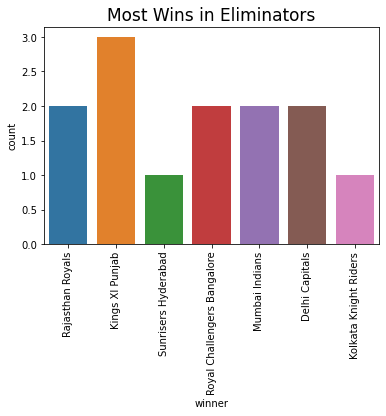

In [22]:
sns.countplot(data['winner'][data['eliminator']=='Y'], data=data)
plt.title("Most Wins in Eliminators", fontsize=17)
plt.xticks(rotation = 90)
plt.show()

### Toss Decision

In [30]:
teams = data['toss_winner'].unique()
decision_making = pd.DataFrame([], columns=['Toss Winner', 'Decision', 'Times'])
for id, element in enumerate(teams):
    temp_bat = data[(data['toss_winner']==element) & (data['toss_decision']=='bat')]
    temp_field = data[(data['toss_winner']==element) & (data['toss_decision']=='field')]
    
    #append to decision making
    decision_making = decision_making.append({'Toss Winner': element, 
                                              'Decision' : 'bat', 'Times': temp_bat['toss_winner'].count()}, ignore_index=True)
    decision_making = decision_making.append({'Toss Winner': element, 
                                              'Decision' : 'field', 'Times': temp_field['toss_winner'].count()}, ignore_index=True)

In [31]:
decision_making

,Toss Winner,Decision,Times
0,Royal Challengers Bangalore,bat,24
1,Royal Challengers Bangalore,field,63
2,Chennai Super Kings,bat,51
3,Chennai Super Kings,field,46
4,Rajasthan Royals,bat,34
5,Rajasthan Royals,field,53
6,Mumbai Indians,bat,48
7,Mumbai Indians,field,58
8,Deccan Chargers,bat,24
9,Deccan Chargers,field,19


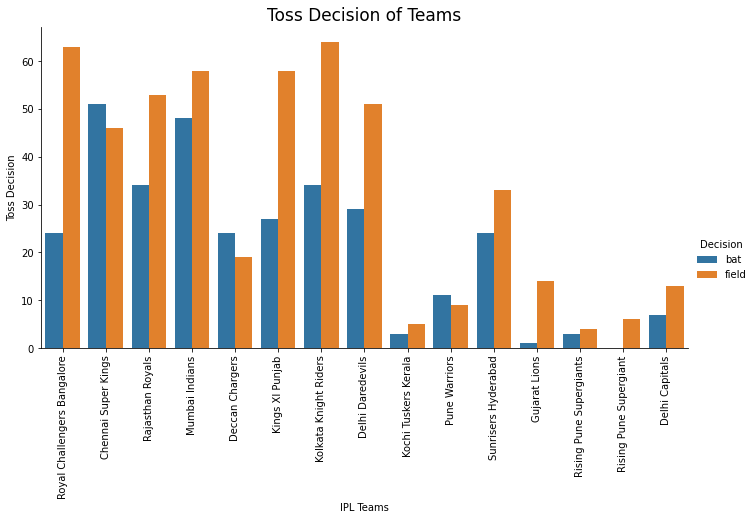

In [35]:
sns.catplot(x="Toss Winner", y="Times", hue="Decision",data= decision_making, kind="bar", height=5, aspect=2)
plt.xticks(rotation = 90)
plt.title("Toss Decision of Teams", fontsize=17)
plt.xlabel("IPL Teams")
plt.ylabel("Toss Decision")
plt.show()

### Famous Venue

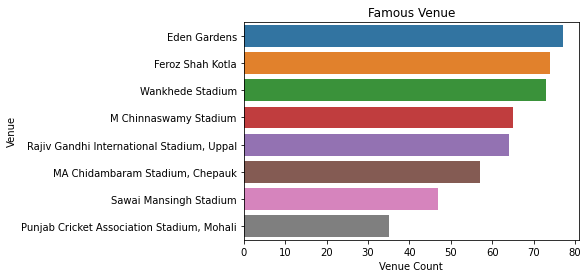

In [37]:
sns.barplot(x = data['venue'].value_counts().head(8).values, 
            y = data['venue'].value_counts().head(8).index,
           data=data)
plt.title("Famous Venue")
plt.xlabel("Venue Count")
plt.ylabel("Venue")
plt.show()

### Top 5 Umpires

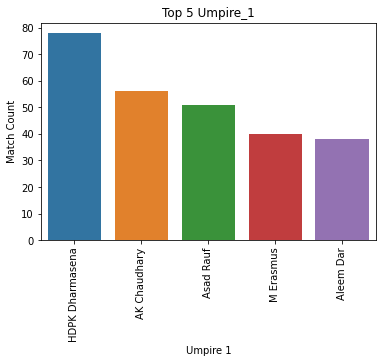

In [40]:
sns.barplot(x=data['umpire1'].value_counts().head().index, 
           y=data['umpire1'].value_counts().head().values,
            data=data
           )
plt.xticks(rotation=90)
plt.xlabel("Umpire 1")
plt.ylabel("Match Count")
plt.title("Top 5 Umpire_1")
plt.show()

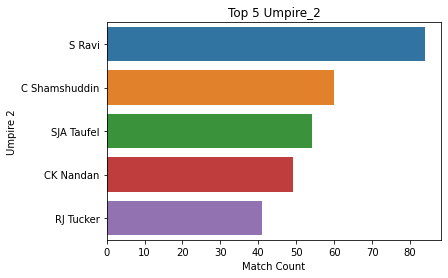

In [42]:
sns.barplot(x=data['umpire2'].value_counts().head().values, 
           y=data['umpire2'].value_counts().head().index,
            data=data
           )
plt.xlabel("Match Count")
plt.ylabel("Umpire 2")
plt.title("Top 5 Umpire_2")
plt.show()